In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Ejercicio 2: Índice de marginación

### Calculo de los indicadores socieconómicos a nivel localidad

- Porcentaje de población de 15 años o más analfabeta. 
    - Población de 15 años o más $\left(P_i^{15+}\right)$: **POB20**
    - Población de 15 años o más analfabeta $\left(P_i^{anal}\right)$: **EDU28**
    - Población de 15 años o más que no especificó su condición de alfabetismo: NAN
    
    $I_{i,1}=\frac{P_i^{anal}}{P_i^{15+}}*100$
    
- Porcentaje de población de 15 años o más sin primaria completa
    - Población de 15 años o más sin escolaridad $\left(P_i^{15+se}\right)$: **EDU31** 
    - Población de 15 años o más con primaria incompleta : **EDU34**
    - Población de 15 años o más con primaria completa : 
    - Población de 15 años o más con secundaria incompleta : **EDU37**
    - Población de 15 años o más con secundaria completa : **EDU40**
    - Población de 18 años o más con educación pos-básica: **EDU43**
    $I_{i,2}=\frac{P_i^{15+se}+P_i^{15+pi}}{P_i^{15+se}+P_i^{15+pi}}$
    
- Porcentaje de viviendas particulares habitadas sin excusado
    - Total de viviendas particulares habitadas: **VIV2**
    - Total viviendas particulares habitadas que disponen de excusado o sanitario: **VIV19**
 
- Porcentaje de viviendas particulares habitadas sin energía eléctrica
    - Viviendas particulares habitadas que no disponen de luz eléctrica: **VIV15**
    - Viviendas particulares habitadas que disponen de luz eléctrica: **VIV14**
    
- Porcentaje de viviendas particulares habitadas sin disponibilidad de agua entubada
    - Viviendas particulares habitadas que no disponen de agua entubada en el ámbito de la vivienda: **VIV17**
    - Viviendas particulares habitadas que disponen de agua entubada en el ámbito de la vivienda: **VIV16**
    
    
- Promedio de ocupantes por cuarto en viviendas particulares habitados (ya calculado): **VIV5_R**

- Porcentaje de viviendas particulares habitadas con piso de tierra
    - Viviendas particulares habitadas con piso de tierra: **VIV6**
    
- Porcentaje de viviendas particulares habitadas que no disponen de refrigerador
    - Viviendas particulares habitadas totales: **VIV2**
    - Viviendas particulares habitadas que disponen de refrigerador: **VIV26**

In [2]:
censo_nl = pd.read_csv("data/censo_nl.csv", encoding='latin-1')

columns = ["POB1","POB20", 
           "EDU28", "EDU31", "EDU34", "EDU37", "EDU40", "EDU43", "EDU46",
          "VIV2","VIV5_R", "VIV6", "VIV14", "VIV15", "VIV16", "VIV17", "VIV19", "VIV20", "VIV26"]

censo_nl = censo_nl[["CVEGEO", "NOMBRE"]+columns]

In [8]:
# Porcentaje de población de 15 años o más analfabeta
censo_nl.loc[:,"i1_edu_anal"] = censo_nl["EDU28"]/censo_nl["POB20"]*100

# Porcentaje de población de 15 años o más sin primaria completa
censo_nl.loc[:,"i2_edu_pri"] = (censo_nl["EDU31"]+censo_nl["EDU34"])/(censo_nl["EDU31"]+censo_nl["EDU34"]+
                                                                  censo_nl["EDU37"]+censo_nl["EDU40"]+
                                                                  censo_nl["EDU43"]+censo_nl["EDU46"])*100

# Porcentaje de viviendas particulares habitadas sin excusado
censo_nl.loc[:,"i3_viv_excu"] = (censo_nl["VIV2"]-censo_nl["VIV19"])/censo_nl["VIV2"]*100
censo_nl.loc[:,"i3_viv_excu_2"] = (censo_nl["VIV20"])/censo_nl["VIV2"]*100

# Porcentaje de viviendas particulares habitadas sin energía eléctrica
censo_nl.loc[:,"i4_viv_elec"] = censo_nl["VIV15"]/(censo_nl["VIV15"]+censo_nl["VIV14"])*100

# Porcentaje de viviendas particulares habitadas sin disponibilidad de agua entubada
censo_nl.loc[:,"i5_viv_agua"] = censo_nl["VIV17"]/(censo_nl["VIV17"]+censo_nl["VIV16"])*100

# Promedio de ocupantes por cuarto en viviendas particulares habitados
censo_nl.loc[:,"i6_viv_poc"] = censo_nl["VIV5_R"]

# Porcentaje de viviendas particulares habitadas con piso de tierra
censo_nl.loc[:,"i7_viv_suelo"] = censo_nl["VIV6"]/censo_nl["VIV2"]*100

# Porcentaje de viviendas particulares habitadas que no disponen de refrigerador
censo_nl.loc[:,"i8_viv_refri"] = (censo_nl["VIV2"]-censo_nl["VIV26"])/censo_nl["VIV2"]*100


In [9]:
censo_nl[censo_nl.NOMBRE=="Alberto Villarreal"]

,CVEGEO,NOMBRE,POB1,POB20,EDU28,EDU31,EDU34,EDU37,EDU40,EDU43,...,VIV26,i1_edu_anal,i2_edu_pri,i3_viv_excu,i3_viv_excu_2,i4_viv_elec,i5_viv_agua,i6_viv_poc,i7_viv_suelo,i8_viv_refri
92,190010047,Alberto Villarreal,716,457,14,16,187,179,72,49,...,162,3.063457,39.11368,8.602151,8.064516,2.717391,22.162162,1.2,3.763441,12.903226


In [17]:
conapo_resultados = pd.read_excel("data/conapo_marginacion_nl.xls")

localidades = conapo_resultados[["Clave del municipio", "Clave de localidad"]]

localidades.loc[:,"lista"] = localidades.loc[:,"Clave del municipio"].astype(str)+"_"+localidades.loc[:,"Clave de localidad"].astype(str)
localidades = localidades.lista.to_list()


/home/enrique/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/enrique/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
censo_nl.head(2)

,CVEGEO,NOMBRE,POB1,POB20,EDU28,EDU31,EDU34,EDU37,EDU40,EDU43,...,VIV26,i1_edu_anal,i2_edu_pri,i3_viv_excu,i3_viv_excu_2,i4_viv_elec,i5_viv_agua,i6_viv_poc,i7_viv_suelo,i8_viv_refri
0,190010001,Abasolo,1976,1352,36,55,503,403,380,212,...,473,2.662722,33.962264,1.984127,1.785714,0.998004,-1.219512,1.0,-1.190476,6.150794
1,190020001,Agualeguas,1995,1534,82,119,736,287,386,230,...,646,5.345502,46.341463,1.793722,1.644245,0.900901,1.051051,0.8,-0.896861,3.437967


In [19]:
censo_nl["cla_mun"] = censo_nl.CVEGEO.astype(str).apply(lambda x: x[2:5]).astype(int).astype(str)
censo_nl["cla_loc"] = censo_nl.CVEGEO.astype(str).apply(lambda x: x[5:]).astype(int).astype(str)

censo_nl["lista"] = censo_nl["cla_mun"]+"_"+censo_nl["cla_loc"]

censo_nl = censo_nl[censo_nl.lista.isin(localidades)].sort_values("CVEGEO")

In [20]:
censo_nl.shape

(2037, 33)

In [21]:
34/1974*1352

23.286727456940223

In [22]:
(7/1976)

0.00354251012145749

In [23]:
censo_nl.head(10)

,CVEGEO,NOMBRE,POB1,POB20,EDU28,EDU31,EDU34,EDU37,EDU40,EDU43,...,i3_viv_excu,i3_viv_excu_2,i4_viv_elec,i5_viv_agua,i6_viv_poc,i7_viv_suelo,i8_viv_refri,cla_mun,cla_loc,lista
0,190010001,Abasolo,1976,1352,36,55,503,403,380,212,...,1.984127,1.785714,0.998004,-1.219512,1.0,-1.190476,6.150794,1,1,1_1
83,190010021,Abasolo,22,10,0,0,4,4,-6,-6,...,40.000000,-120.000000,0.000000,100.000000,-6.0,0.000000,0.000000,1,21,1_21
91,190010046,Colinas del Fraile,34,-9,-9,-9,-9,-9,-9,-9,...,228.571429,-128.571429,50.000000,50.000000,-9.0,-128.571429,228.571429,1,46,1_46
92,190010047,Alberto Villarreal,716,457,14,16,187,179,72,49,...,8.602151,8.064516,2.717391,22.162162,1.2,3.763441,12.903226,1,47,1_47
1,190020001,Agualeguas,1995,1534,82,119,736,287,386,230,...,1.793722,1.644245,0.900901,1.051051,0.8,-0.896861,3.437967,2,1,2_1
94,190020009,Tres Hermanos,58,41,0,3,27,6,5,3,...,0.000000,0.000000,0.000000,-85.714286,1.1,0.000000,0.000000,2,9,2_9
95,190020012,Cieneguitas,57,53,3,3,37,7,6,6,...,14.285714,-28.571429,0.000000,-46.153846,1.0,-28.571429,4.761905,2,12,2_12
96,190020017,La Escondida,173,140,4,3,96,21,15,11,...,8.064516,4.838710,0.000000,-11.538462,0.9,0.000000,3.225806,2,17,2_17
98,190020021,Los Garza,244,197,5,6,117,52,21,16,...,1.176471,-7.058824,0.000000,-7.692308,0.8,0.000000,2.352941,2,21,2_21
100,190020027,Lagunillas (San José Lagunillas),60,45,-6,-6,36,3,5,4,...,5.000000,-30.000000,0.000000,-46.153846,1.0,-30.000000,0.000000,2,27,2_27


### Nueva base
- Porcentaje de población de 15 años o más analfabeta. 
    - Población de 15 años o más $\left(P_i^{15+}\right)$: **P_15YMAS**
    - Población de 15 años o más analfabeta $\left(P_i^{anal}\right)$: **P15YM_AN**
    - Población de 15 años o más que no especificó su condición de alfabetismo: NAN
    
    $I_{i,1}=\frac{P_i^{anal}}{P_i^{15+}}*100$
    
- Porcentaje de población de 15 años o más sin primaria completa
    - Población de 15 años o más sin escolaridad $\left(P_i^{15+se}\right)$: **P15YM_SE** 
    - Población de 15 años o más con primaria incompleta : **P15PRI_IN**
    - Población de 15 años o más con primaria completa : **P15PRI_CO**
    - Población de 15 años o más con secundaria incompleta : **P15SEC_IN**
    - Población de 15 años o más con secundaria completa : **P15SEC_CO**
    - Población de 18 años o más con educación pos-básica: **P18YM_PB**
    $I_{i,2}=\frac{P_i^{15+se}+P_i^{15+pi}}{P_i^{15+se}+P_i^{15+pi}}$
    
- Porcentaje de viviendas particulares habitadas sin excusado
    - Total de viviendas particulares habitadas: **TVIVPARHAB**
    - Total viviendas particulares habitadas que disponen de excusado o sanitario: **VPH_EXCSA**
 
- Porcentaje de viviendas particulares habitadas sin energía eléctrica
    - Viviendas particulares habitadas que no disponen de luz eléctrica: **VPH_S_ELEC**
    - Viviendas particulares habitadas que disponen de luz eléctrica: **VPH_C_ELEC**
    
- Porcentaje de viviendas particulares habitadas sin disponibilidad de agua entubada
    - Viviendas particulares habitadas que no disponen de agua entubada en el ámbito de la vivienda: **VPH_AGUADV**
    - Viviendas particulares habitadas que disponen de agua entubada en el ámbito de la vivienda: **VPH_AGUAFV**
    
    
- Promedio de ocupantes por cuarto en viviendas particulares habitados (ya calculado): **PRO_OCUP_C**

- Porcentaje de viviendas particulares habitadas con piso de tierra
    - Viviendas particulares habitadas con piso de tierra: **VPH_PISOTI**
    - Viviendas particulares habitadas con piso diferente de tierra **VPH_PISODT**
    
- Porcentaje de viviendas particulares habitadas que no disponen de refrigerador
    - Viviendas particulares habitadas totales: **TVIVPARHAB**
    - Viviendas particulares habitadas que disponen de refrigerador: **VPH_REFRI**

In [112]:
censo_nl_new = pd.read_csv("data/censo_nl_update.csv")
censo_nl_new = censo_nl_new[~censo_nl_new.LONGITUD.isnull()]
censo_nl_new["cl_loc"] = censo_nl_new["MUN"].astype(str)+"_"+censo_nl_new["LOC"].astype(str)

censo_nl_new.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_TV,VPH_REFRI,VPH_LAVAD,VPH_AUTOM,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,TAM_LOC,cl_loc
1,19,Nuevo León,1,Abasolo,1,Abasolo,1002356.0,255643.0,518.0,1976,...,493,473,420,271,116,104,397,51,4.0,1_1
2,19,Nuevo León,1,Abasolo,8,La Gloria,1002247.0,255614.0,499.0,7,...,*,*,*,*,*,*,*,*,1.0,1_8
3,19,Nuevo León,1,Abasolo,9,Los Ligeros,1002338.0,255555.0,501.0,3,...,*,*,*,*,*,*,*,*,1.0,1_9
4,19,Nuevo León,1,Abasolo,11,La Muralla,1002344.0,255620.0,500.0,4,...,*,*,*,*,*,*,*,*,1.0,1_11
5,19,Nuevo León,1,Abasolo,21,Abasolo,1002433.0,255619.0,516.0,22,...,4,5,3,1,1,0,2,0,1.0,1_21


In [115]:
censo_nl_new.shape

(5261, 20)

In [116]:
columns_new = ["P_15YMAS","P15YM_AN", 
           "P15YM_SE", "P15PRI_IN", "P15PRI_CO", "P15SEC_IN", "P15SEC_CO", "P18YM_PB",
           "TVIVPARHAB", "VPH_EXCSA",
           "VPH_S_ELEC", "VPH_C_ELEC",
           "VPH_AGUADV", "VPH_AGUAFV",
           "PRO_OCUP_C",
           "VPH_PISOTI", "VPH_PISODT",
           "VPH_REFRI"]

censo_nl_new = censo_nl_new[["cl_loc", "NOM_LOC"]+columns_new]

In [117]:
censo_nl_new[censo_nl_new=="*"]="-1"
censo_nl_new = censo_nl_new[censo_nl_new.P_15YMAS!='N/D']

In [118]:
for i in columns_new:
    censo_nl_new[i] = censo_nl_new[i].astype(float)
    censo_nl_new[i] = censo_nl_new[i].replace({-1:np.nan}) 

In [119]:
# Porcentaje de población de 15 años o más analfabeta
censo_nl_new.loc[:,"i1_edu_anal"] = censo_nl_new["P15YM_AN"]/censo_nl_new["P_15YMAS"]*100

# Porcentaje de población de 15 años o más sin primaria completa
censo_nl_new.loc[:,"i2_edu_pri"] = (censo_nl_new["P15YM_SE"]+censo_nl_new["P15PRI_IN"])/(censo_nl_new["P15YM_SE"]+censo_nl_new["P15PRI_IN"]+
                                                                  censo_nl_new["P15PRI_CO"]+censo_nl_new["P15SEC_IN"]+
                                                                  censo_nl_new["P15SEC_CO"]+censo_nl_new["P18YM_PB"])*100

# Porcentaje de viviendas particulares habitadas sin excusado
censo_nl_new.loc[:,"i3_viv_excu"] = (censo_nl_new["TVIVPARHAB"]-censo_nl_new["VPH_EXCSA"])/censo_nl_new["TVIVPARHAB"]*100

# Porcentaje de viviendas particulares habitadas sin energía eléctrica
censo_nl_new.loc[:,"i4_viv_elec"] = censo_nl_new["VPH_S_ELEC"]/(censo_nl_new["VPH_S_ELEC"]+censo_nl_new["VPH_C_ELEC"])*100

# Porcentaje de viviendas particulares habitadas sin disponibilidad de agua entubada
censo_nl_new.loc[:,"i5_viv_agua"] = censo_nl_new["VPH_AGUAFV"]/(censo_nl_new["VPH_AGUAFV"]+censo_nl_new["VPH_AGUADV"])*100

# Promedio de ocupantes por cuarto en viviendas particulares habitados
censo_nl_new.loc[:,"i6_viv_poc"] = censo_nl_new["PRO_OCUP_C"]

# Porcentaje de viviendas particulares habitadas con piso de tierra
censo_nl_new.loc[:,"i7_viv_suelo"] = censo_nl_new["VPH_PISOTI"]/(censo_nl_new["VPH_PISOTI"]+censo_nl_new["VPH_PISODT"])*100

# Porcentaje de viviendas particulares habitadas que no disponen de refrigerador
censo_nl_new.loc[:,"i8_viv_refri"] = (censo_nl_new["TVIVPARHAB"]-censo_nl_new["VPH_REFRI"])/censo_nl_new["TVIVPARHAB"]*100


In [120]:
indices = ['i1_edu_anal','i2_edu_pri', 'i3_viv_excu', 'i4_viv_elec', 'i5_viv_agua', 'i6_viv_poc',
       'i7_viv_suelo', 'i8_viv_refri']

censo_nl_new["null_total_i"] = censo_nl_new[indices].isnull().sum(axis=1)
censo_nl_new[censo_nl_new.null_total_i<2][["cl_loc", "NOM_LOC"]+indices].head(7)


,cl_loc,NOM_LOC,i1_edu_anal,i2_edu_pri,i3_viv_excu,i4_viv_elec,i5_viv_agua,i6_viv_poc,i7_viv_suelo,i8_viv_refri
1,1_1,Abasolo,2.662722,18.706697,6.616257,0.998004,0.200401,1.03,0.398406,10.586011
5,1_21,Abasolo,0.000000,0.000000,40.000000,0.000000,100.000000,2.00,0.000000,0.000000
13,1_46,Colinas del Fraile,0.000000,12.500000,75.000000,57.142857,71.428571,1.72,57.142857,75.000000
14,1_47,Alberto Villarreal,3.063457,14.765101,9.090909,2.717391,22.162162,1.21,3.783784,13.368984
18,2_1,Agualeguas,5.345502,28.179902,1.793722,0.900901,1.051051,0.76,0.300300,3.437967
20,2_9,Tres Hermanos,0.000000,30.769231,0.000000,0.000000,7.142857,1.07,0.000000,0.000000
21,2_12,Cieneguitas,5.660377,33.962264,14.285714,0.000000,5.000000,0.98,10.000000,4.761905


In [127]:
censo_nl_new[censo_nl_new.null_total_i==8][["cl_loc", "NOM_LOC"]+indices].shape

(3224, 10)

In [136]:
data.shape

(2037, 10)

In [129]:
data =censo_nl_new[censo_nl_new.null_total_i<8][["cl_loc", "NOM_LOC"]+indices]

[]

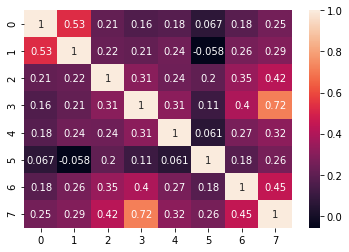

In [149]:
sns.heatmap(pd.DataFrame(censo_nl_new_escale).corr(),annot=True)
plt.plot()

In [189]:
np.round(pca.components_,3)

array([[0.291, 0.321, 0.36 , 0.425, 0.312, 0.17 , 0.385, 0.478]])

In [159]:
censo_nl_new_escale = StandardScaler(with_mean=True,with_std=True).fit_transform(data[indices])
pca = PCA(n_components=1).fit(censo_nl_new_escale)

In [166]:
data["indice_pca"] = [item for sublist in pca.transform(censo_nl_new_escale) for item in sublist]

In [178]:
data["indice_pca_sta"] = (data["indice_pca"]-data["indice_pca"].min())/(data["indice_pca"]+data["indice_pca"].max())*100

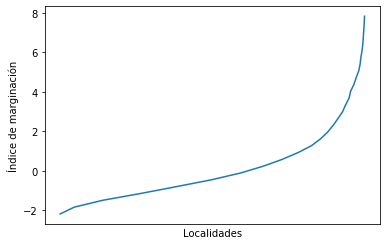

In [228]:
# Choose how many bins you want here
num_bins = 30

# Use the histogram function to bin the data
counts, bin_edges = np.histogram(data["indice_pca"], bins=num_bins, density=True)

# Now find the cdf
cdf = np.cumsum(counts)

# And finally plot the cdf
plt.plot(cdf,bin_edges[1:])
plt.xlabel("Localidades")
plt.ylabel("Índice de marginación")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
plt.show()

In [267]:
data["grado_marginacion"] = data["indice_pca"].apply(lambda x: "muy_bajo" if x<-1.32309 else(
                                                                "bajo" if x<-1.06870 else (
                                                                "medio" if x<-0.81425 else(
                                                                "alto" if x<0.71231 else "muy_alto"))))

In [276]:
data[data.cl_loc=="19_1"]

,cl_loc,NOM_LOC,i1_edu_anal,i2_edu_pri,i3_viv_excu,i4_viv_elec,i5_viv_agua,i6_viv_poc,i7_viv_suelo,i8_viv_refri,indice_pca,indice_pca_sta,grado_marginacion,grado_marginacion2
2313,19_1,San Pedro Garza García,1.384005,6.797686,10.568214,0.020945,0.143673,0.69,1.29541,12.135268,-1.887897,10.668944,muy_bajo,muy_bajo


In [251]:
data["grado_marginacion"] = data["indice_pca_sta"].apply(lambda x: "muy_bajo" if x<4.14836 else(
                                                                "bajo" if x<6.16786 else (
                                                                "medio" if x<8.18785 else(
                                                                "alto" if x<20.30683 else "muy_alto"))))

In [253]:
1503/2037

0.7378497790868925

In [252]:
data["grado_marginacion"].value_counts()

muy_alto    1503
alto         479
medio         28
bajo          17
muy_bajo      10
Name: grado_marginacion, dtype: int64

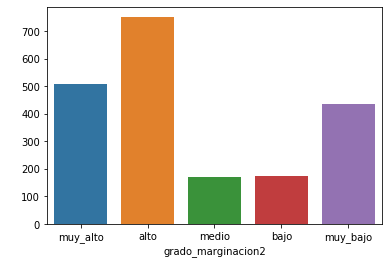

In [268]:
sns.countplot(data["grado_marginacion2"], order=["muy_alto","alto","medio","bajo","muy_bajo"])
plt.ylabel(" ")
plt.show()

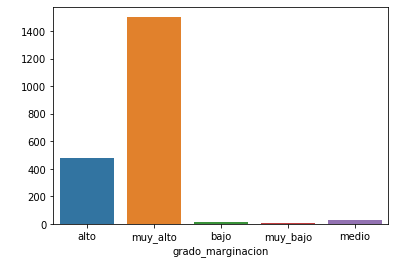

In [259]:
sns.countplot(data["grado_marginacion"])
plt.ylabel(" ")
plt.show()

In [213]:
, 8.18785 , 20.30683, 100

array([ 0.        ,  2.20335191,  4.40670382,  6.61005573,  8.81340764,
       11.01675954, 13.22011145, 15.42346336, 17.62681527, 19.83016718,
       22.03351909, 24.236871  , 26.44022291, 28.64357481, 30.84692672,
       33.05027863, 35.25363054, 37.45698245, 39.66033436, 41.86368627,
       44.06703818, 46.27039009, 48.47374199, 50.6770939 , 52.88044581,
       55.08379772, 57.28714963, 59.49050154, 61.69385345, 63.89720536,
       66.10055727])

In [203]:
data["indice_pca_sta"]

1       14.329324
5       28.075988
13      53.448825
14      19.190537
18      13.453351
          ...    
5379    14.246754
5381    27.743155
5383    12.908335
5384    11.111992
5388    13.143270
Name: indice_pca_sta, Length: 2037, dtype: float64

In [195]:
sns.xkcd_rgb(data["indice_pca_sta"])

TypeError: 'dict' object is not callable

# Nacional

In [3]:
!pip install dbfread

In [1]:
from dbfread import DBF
import pandas as pd

nacional = DBF('data/ITER_NALDBF10.dbf')
print("Termino de Leer")
nacional = pd.DataFrame(iter(nacional))

nacional.to_csv("data/nacional_iter_2010.csv", index=False)

In [3]:
columns_new = ["P_15YMAS","P15YM_AN", 
           "P15YM_SE", "P15PRI_IN", "P15PRI_CO", "P15SEC_IN", "P15SEC_CO", "P18YM_PB",
           "TVIVPARHAB", "VPH_EXCSA",
           "VPH_S_ELEC", "VPH_C_ELEC",
           "VPH_AGUADV", "VPH_AGUAFV",
           "PRO_OCUP_C",
           "VPH_PISOTI", "VPH_PISODT",
           "VPH_REFRI"]

In [36]:
censo_nl_new = pd.read_csv("data/nacional_iter_2010.csv")
censo_nl_new = censo_nl_new[~censo_nl_new.LONGITUD.isnull()]
censo_nl_new["cl_loc"] = censo_nl_new["MUN"].astype(str)+"_"+censo_nl_new["LOC"].astype(str)

censo_nl_new = censo_nl_new[["cl_loc", "NOM_LOC"]+columns_new]

censo_nl_new[censo_nl_new=="*"]="-1"
censo_nl_new = censo_nl_new[censo_nl_new.P_15YMAS!='N/D']

In [37]:
for i in columns_new:
    censo_nl_new[i] = censo_nl_new[i].astype(float)
    censo_nl_new[i] = censo_nl_new[i].replace({-1:np.nan}) 

In [38]:
# Porcentaje de población de 15 años o más analfabeta
censo_nl_new.loc[:,"i1_edu_anal"] = censo_nl_new["P15YM_AN"]/censo_nl_new["P_15YMAS"]*100

# Porcentaje de población de 15 años o más sin primaria completa
censo_nl_new.loc[:,"i2_edu_pri"] = (censo_nl_new["P15YM_SE"]+censo_nl_new["P15PRI_IN"])/(censo_nl_new["P15YM_SE"]+censo_nl_new["P15PRI_IN"]+
                                                                  censo_nl_new["P15PRI_CO"]+censo_nl_new["P15SEC_IN"]+
                                                                  censo_nl_new["P15SEC_CO"]+censo_nl_new["P18YM_PB"])*100

# Porcentaje de viviendas particulares habitadas sin excusado
censo_nl_new.loc[:,"i3_viv_excu"] = (censo_nl_new["TVIVPARHAB"]-censo_nl_new["VPH_EXCSA"])/censo_nl_new["TVIVPARHAB"]*100

# Porcentaje de viviendas particulares habitadas sin energía eléctrica
censo_nl_new.loc[:,"i4_viv_elec"] = censo_nl_new["VPH_S_ELEC"]/(censo_nl_new["VPH_S_ELEC"]+censo_nl_new["VPH_C_ELEC"])*100

# Porcentaje de viviendas particulares habitadas sin disponibilidad de agua entubada
censo_nl_new.loc[:,"i5_viv_agua"] = censo_nl_new["VPH_AGUAFV"]/(censo_nl_new["VPH_AGUAFV"]+censo_nl_new["VPH_AGUADV"])*100

# Promedio de ocupantes por cuarto en viviendas particulares habitados
censo_nl_new.loc[:,"i6_viv_poc"] = censo_nl_new["PRO_OCUP_C"]

# Porcentaje de viviendas particulares habitadas con piso de tierra
censo_nl_new.loc[:,"i7_viv_suelo"] = censo_nl_new["VPH_PISOTI"]/(censo_nl_new["VPH_PISOTI"]+censo_nl_new["VPH_PISODT"])*100

# Porcentaje de viviendas particulares habitadas que no disponen de refrigerador
censo_nl_new.loc[:,"i8_viv_refri"] = (censo_nl_new["TVIVPARHAB"]-censo_nl_new["VPH_REFRI"])/censo_nl_new["TVIVPARHAB"]*100


In [39]:
indices = ['i1_edu_anal','i2_edu_pri', 'i3_viv_excu', 'i4_viv_elec', 'i5_viv_agua', 'i6_viv_poc',
       'i7_viv_suelo', 'i8_viv_refri']

censo_nl_new["null_total_i"] = censo_nl_new[indices].isnull().sum(axis=1)
censo_nl_new[censo_nl_new.null_total_i<1][["cl_loc", "NOM_LOC"]+indices].head(7)


,cl_loc,NOM_LOC,i1_edu_anal,i2_edu_pri,i3_viv_excu,i4_viv_elec,i5_viv_agua,i6_viv_poc,i7_viv_suelo,i8_viv_refri
7,1_1,Aguascalientes,2.256844,10.904746,0.810051,0.158217,0.592209,0.87,1.062457,6.259389
9,1_96,Agua Azul,17.857143,48.148148,45.454545,0.000000,36.363636,0.82,0.000000,9.090909
12,1_104,Ardillas de Abajo (Las Ardillas),0.000000,20.000000,0.000000,0.000000,0.000000,0.88,0.000000,0.000000
13,1_106,Arellano,5.600933,24.703088,1.960784,1.176471,3.937008,1.30,3.137255,10.588235
14,1_112,Bajío los Vázquez,14.285714,38.095238,0.000000,0.000000,0.000000,1.28,0.000000,9.090909
15,1_114,Residencial San Nicolás [Baños la Cantera],0.000000,1.627907,5.660377,0.000000,2.525253,0.62,0.505051,4.716981
16,1_120,Buenavista de Peñuelas,10.708402,29.519071,5.529954,0.462963,10.138249,1.12,1.843318,5.990783


In [40]:
censo_nl_new = censo_nl_new[censo_nl_new.null_total_i==0][["cl_loc", "NOM_LOC"]+indices]

In [22]:
censo_nl_new[indices]

,i1_edu_anal,i2_edu_pri,i3_viv_excu,i4_viv_elec,i5_viv_agua,i6_viv_poc,i7_viv_suelo,i8_viv_refri
7,2.256844,10.904746,0.810051,0.158217,0.592209,0.87,1.062457,6.259389
9,17.857143,48.148148,45.454545,0.000000,36.363636,0.82,0.000000,9.090909
12,0.000000,20.000000,0.000000,0.000000,0.000000,0.88,0.000000,0.000000
13,5.600933,24.703088,1.960784,1.176471,3.937008,1.30,3.137255,10.588235
14,14.285714,38.095238,0.000000,0.000000,0.000000,1.28,0.000000,9.090909
...,...,...,...,...,...,...,...,...
198476,4.000000,44.000000,9.523810,4.761905,19.047619,1.13,61.904762,38.095238
198479,5.882353,64.705882,0.000000,0.000000,0.000000,0.73,33.333333,55.555556
198480,8.536585,51.250000,17.241379,0.000000,3.448276,1.07,10.344828,51.724138
198482,8.148148,43.703704,10.638298,0.000000,2.127660,1.28,4.255319,12.765957


In [80]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
censo_nl_new_escale = StandardScaler(with_mean=True,with_std=True).fit_transform(censo_nl_new[indices])
pca = PCA(n_components=8).fit(censo_nl_new_escale)

eigenfaces = pca.components_

In [81]:
pca.explained_variance_ratio_

array([0.47702912, 0.12206178, 0.09607139, 0.08566208, 0.08392289,
       0.06754304, 0.03678983, 0.03091987])

In [93]:
cov = np.cov(censo_nl_new_escale.T)
eig_val, eig_vec = np.linalg.eig(cov)

In [110]:
eig_vec.T[0]

array([0.37988001, 0.36859303, 0.32204749, 0.36654416, 0.26586205,
       0.32751777, 0.36497693, 0.41304052])

In [104]:
3.81626844*0.37988001

1.4497240931498843

In [105]:
3.81626844*0.24736129

0.9439970843046877

In [111]:
eig_val[0]*eig_vec.T[0]

array([1.44972409, 1.40664996, 1.22901966, 1.3988309 , 1.01460096,
       1.24989573, 1.39284992, 1.57627352])

# Ejercicio 3: Labelled Faces in the Wild 

In [1]:
# cargamos los datos
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1)

In [2]:
len(lfw_people.images)

514

In [3]:
for name in lfw_people.target_names:
    print (name)
    
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data

y = lfw_people.target
target_names = lfw_people.target_names

from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test, names_train, names_test = train_test_split(X, y, target_names[y],
test_size =0.2 , random_state =42)

George W Bush
Gerhard Schroeder


In [2]:
import matplotlib.pylab as plt
import numpy as np
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot 25 random faces
j = 1
np.random.seed(0)

for i in np.random.choice(range(X_train.shape[0]), 10):
  ax = fig.add_subplot(2, 5, j, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_train[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  j += 1
plt.show()

NameError: name 'X_train' is not defined

<Figure size 360x360 with 0 Axes>

In [63]:
from sklearn.decomposition import PCA

n_components = 2

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 2 eigenfaces from 411 faces
Projecting the input data on the eigenfaces orthonormal basis


In [69]:
X_train.shape

(411, 11750)

In [74]:
np.reshape(X_train[i,:],(125,94))*eigenfaces[1]+np.reshape(X_train[i,:],(125,94))*eigenfaces[0]

array([[ 0.5337751 ,  0.47230434,  0.40964103, ..., -0.2593634 ,
        -0.3590643 , -0.560716  ],
       [ 0.47064173,  0.4479754 ,  0.44194406, ..., -0.2791741 ,
        -0.3238302 , -0.5307133 ],
       [ 0.47417727,  0.45608824,  0.4625874 , ..., -0.34766215,
        -0.3135531 , -0.4828931 ],
       ...,
       [ 0.5613096 ,  0.41264302,  0.5849108 , ..., -0.25315076,
        -0.29176787, -0.372152  ],
       [ 0.5337342 ,  0.41227123,  0.55165374, ..., -0.29728365,
        -0.30832148, -0.3694867 ],
       [ 0.5223012 ,  0.3924141 ,  0.5227076 , ..., -0.29368046,
        -0.26519367, -0.31672114]], dtype=float32)

In [67]:
eigenfaces[1].shape

(125, 94)

In [62]:
X_train_pca.shape

(411, 411)

In [54]:
200/14

14.285714285714286

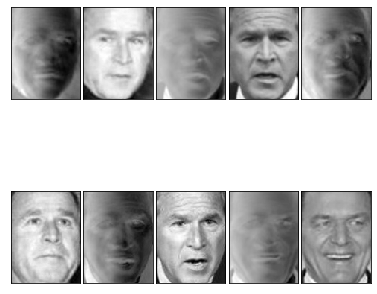

In [75]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot 25 random faces
j = 1
np.random.seed(0)

for i in np.random.choice(range(X_train.shape[0]), 5):
  ax = fig.add_subplot(2, 5, j, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_train[i,:],(125,94))*eigenfaces[1]+np.reshape(X_train[i,:],(125,94))*eigenfaces[0], 
            cmap=plt.cm.gray, interpolation='nearest')
    
  ax = fig.add_subplot(2, 5, j+1, xticks=[], yticks=[])
  ax.imshow(np.reshape(X_train[i,:],(125,94)), cmap=plt.cm.gray, interpolation='nearest')
  j += 2
plt.show()


In [9]:
X_train_pca.shape

(411, 50)